<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/XGBoost_Regression_Model_in_Detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library Section

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
warnings.filterwarnings("ignore")
from google.colab import drive
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/py-master/ML/18_XGBoost_Regression/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Real estate valuation data set.xlsx'


# Data

In [2]:
# reading  data in the file
df = pd.read_excel('/content/drive/MyDrive/py-master/ML/18_XGBoost_Regression/Real estate valuation data set.xlsx')
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3


# Data Information

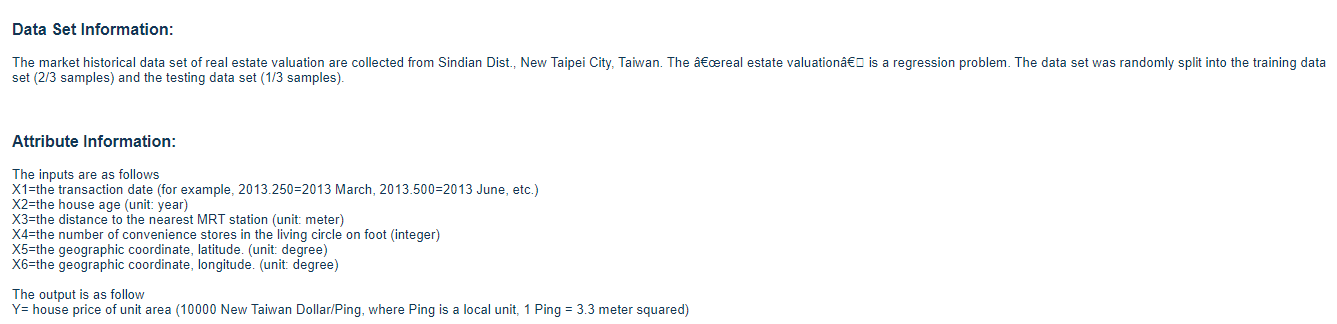

# Rename columns

In [3]:
new_names = ['No','Dates','age','distance','stores','lat','long','price']
df.columns = new_names
df.drop(['No','Dates'], axis=1, inplace=True)
df.head(5)

,age,distance,stores,lat,long,price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       414 non-null    float64
 1   distance  414 non-null    float64
 2   stores    414 non-null    int64  
 3   lat       414 non-null    float64
 4   long      414 non-null    float64
 5   price     414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


# Null and missing values

In [6]:
df.isna().sum()

age         0
distance    0
stores      0
lat         0
long        0
price       0
dtype: int64

# EDA

In [7]:
X = df.drop('price',axis=1)
y= df.price

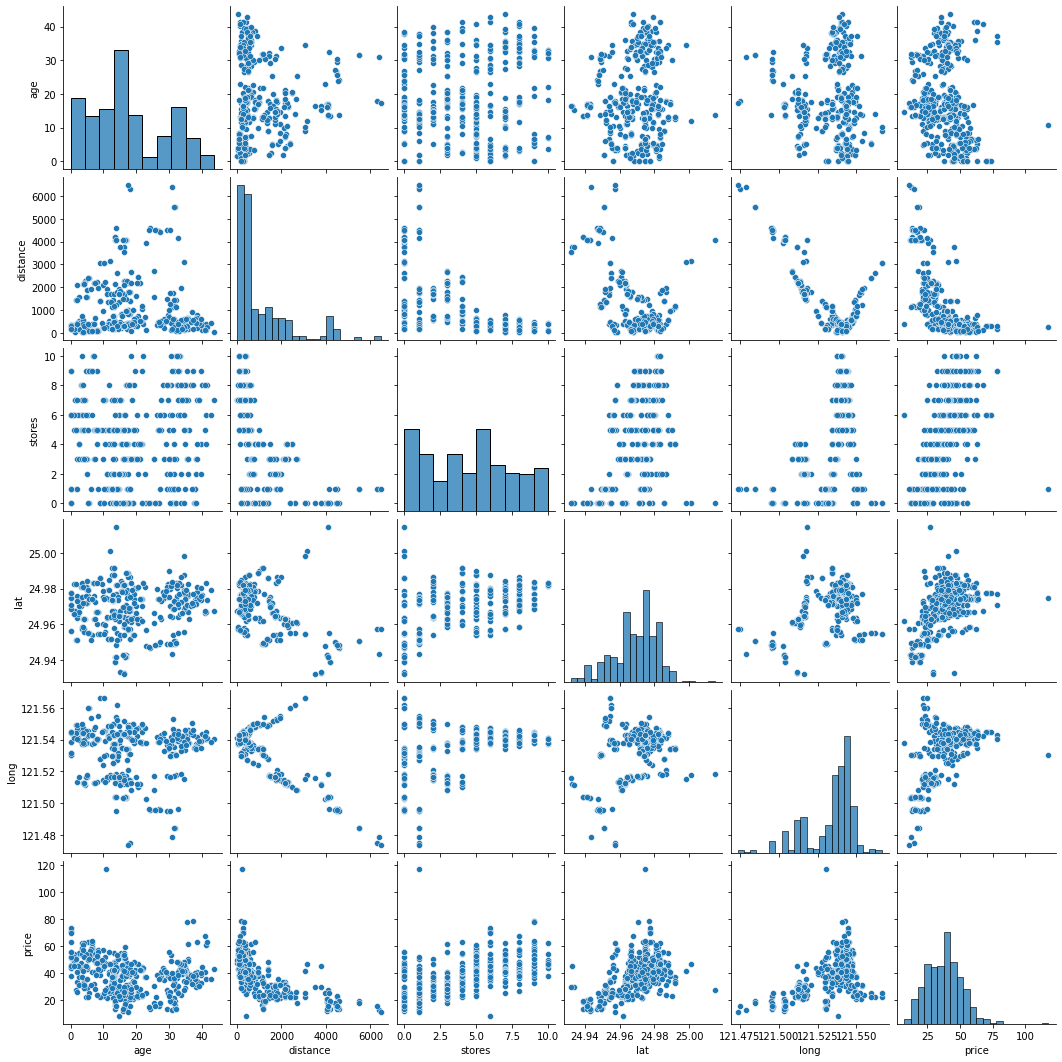

In [8]:
import seaborn as sns
sns.pairplot(data=df)

# Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((277, 5), (277,), (137, 5), (137,))

#Model fitting & Testing

In [11]:
model = XGBRegressor()

In [12]:
model.fit(X_train,y_train)

[03:09:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

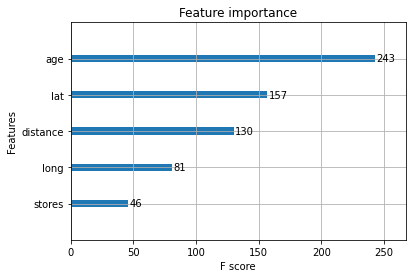

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

In [14]:
pred_test= model.predict(X_test)
pred_train = model.predict(X_train)

In [15]:
pred_test[:10]

array([48.374763, 39.10109 , 51.127274, 37.540455, 25.211136, 41.01472 ,
       48.176193, 48.585358, 15.307383, 58.107536], dtype=float32)

In [16]:
y_test[:10]

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
72     36.3
262    53.0
140    51.4
93     16.1
70     59.0
Name: price, dtype: float64

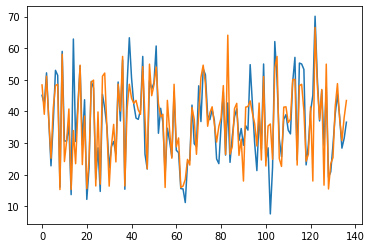

In [17]:
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(pred_test)), pred_test)

#Model Error/Accuracy

In [18]:
model.score(X_test,y_test)

0.7053698287190275

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
print("Train R2 score :",r2_score(y_train,pred_train))
print("Test R2 score :",r2_score(y_test,pred_test))
print("Train MSE score :",mean_squared_error(y_train,pred_train))
print("Test MSE score :",mean_squared_error(y_test,pred_test))

Train R2 score : 0.9252263320065441
Test R2 score : 0.7053698287190275
Train MSE score : 14.616118506029382
Test MSE score : 47.25873472937947


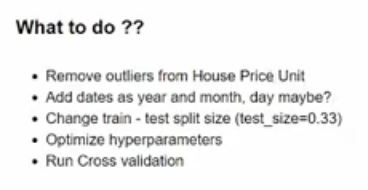

# Cross validation

In [20]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {'objective': 'reg:squarederror','eval_metric':'rmse',
          'eta':0.01,
          'subsample':0.1}
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = 'rmse',seed=42) 

In [21]:
grid = pd.DataFrame({'eta':[0.01,0.05,0.1]*2,
'subsample':np.repeat([0.1,0.3],3)})